## Model accuracy comparison (Training/Combined)


In [280]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [281]:
df = pd.read_csv("train1.csv")


In [284]:
test_df = pd.read_csv('test_final.csv')
test_ids = test_df['id']

In [298]:
numeric_features = [
    'Age', 'Height', 'Weight', 'BMI','BMIxGender' ,'HeightWeightRatio','BMI_FAF','BMI_sq','Weight_sq'
    , 'CH2O', 'FAF', 'TUE'
]

categorical_features = [
    'Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'FCVC', 'NCP','Obesity_Type_III_Profile',
      'CALC', 'MTRANS', 'SCC','SMOKE'
    	
]

In [299]:
le = LabelEncoder()
y = le.fit_transform(df['WeightCategory'])

In [300]:
X = df[numeric_features + categorical_features]
X_test_submission = test_df[numeric_features + categorical_features]
X.shape

(15533, 23)

In [301]:
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numeric_features),
                                               ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)], remainder='passthrough')

In [302]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        objective='multi:softmax',
        num_class=len(le.classes_),
        random_state=42,
        n_jobs=-1,
        device='cuda',
        tree_method='hist'
    ))
])

In [303]:
# Set up 5-Fold Cross-Validation
k_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [304]:
# Grid 4
param_grid_4 = {
   'classifier__n_estimators': [960],
    'classifier__learning_rate': [0.045],
    'classifier__max_depth': [4],
    'classifier__min_child_weight': [1],
    'classifier__subsample': [0.7],
    'classifier__colsample_bytree': [0.8],
    'classifier__gamma': [0.1], 
    }

In [305]:
# GridSearchCV
grid_search_xgb4 = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid_4,
    cv=k_folds,
    scoring='accuracy',
    n_jobs=1,  
    verbose=2
)

In [306]:
grid_search_xgb4.fit(X, y)

results_df4 = pd.DataFrame(grid_search_xgb4.cv_results_)

print(f"Best XGBoost CV Accuracy: {grid_search_xgb4.best_score_ * 100:.3f}%")
print(f"Best XGBoost Parameters: {grid_search_xgb4.best_params_}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END classifier__colsample_bytree=0.8, classifier__gamma=0.1, classifier__learning_rate=0.045, classifier__max_depth=4, classifier__min_child_weight=1, classifier__n_estimators=960, classifier__subsample=0.7; total time= 1.6min
[CV] END classifier__colsample_bytree=0.8, classifier__gamma=0.1, classifier__learning_rate=0.045, classifier__max_depth=4, classifier__min_child_weight=1, classifier__n_estimators=960, classifier__subsample=0.7; total time= 1.5min
[CV] END classifier__colsample_bytree=0.8, classifier__gamma=0.1, classifier__learning_rate=0.045, classifier__max_depth=4, classifier__min_child_weight=1, classifier__n_estimators=960, classifier__subsample=0.7; total time=   9.7s
[CV] END classifier__colsample_bytree=0.8, classifier__gamma=0.1, classifier__learning_rate=0.045, classifier__max_depth=4, classifier__min_child_weight=1, classifier__n_estimators=960, classifier__subsample=0.7; total time=   8.8s
[CV] END clas

In [307]:
# Grid 6
param_grid_6 = {
   'classifier__n_estimators': [950],
    'classifier__learning_rate': [0.045],
    'classifier__max_depth': [4],
    'classifier__min_child_weight': [1],
    'classifier__subsample': [0.7],
    'classifier__colsample_bytree': [0.8],
    'classifier__gamma': [0.1], 
    'classifier__reg_alpha': [0.1],
    'classifier__reg_lambda': [4]
    }

In [308]:
# GridSearchCV
grid_search_xgb6 = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid_6,
    cv=k_folds,
    scoring='accuracy',
    n_jobs=1,  
    verbose=2
)

In [309]:
grid_search_xgb6.fit(X, y)

results_df4 = pd.DataFrame(grid_search_xgb6.cv_results_)

print(f"Best XGBoost CV Accuracy: {grid_search_xgb6.best_score_ * 100:.3f}%")
print(f"Best XGBoost Parameters: {grid_search_xgb6.best_params_}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END classifier__colsample_bytree=0.8, classifier__gamma=0.1, classifier__learning_rate=0.045, classifier__max_depth=4, classifier__min_child_weight=1, classifier__n_estimators=950, classifier__reg_alpha=0.1, classifier__reg_lambda=4, classifier__subsample=0.7; total time=   8.7s
[CV] END classifier__colsample_bytree=0.8, classifier__gamma=0.1, classifier__learning_rate=0.045, classifier__max_depth=4, classifier__min_child_weight=1, classifier__n_estimators=950, classifier__reg_alpha=0.1, classifier__reg_lambda=4, classifier__subsample=0.7; total time=   8.9s
[CV] END classifier__colsample_bytree=0.8, classifier__gamma=0.1, classifier__learning_rate=0.045, classifier__max_depth=4, classifier__min_child_weight=1, classifier__n_estimators=950, classifier__reg_alpha=0.1, classifier__reg_lambda=4, classifier__subsample=0.7; total time=   8.4s
[CV] END classifier__colsample_bytree=0.8, classifier__gamma=0.1, classifier__learning

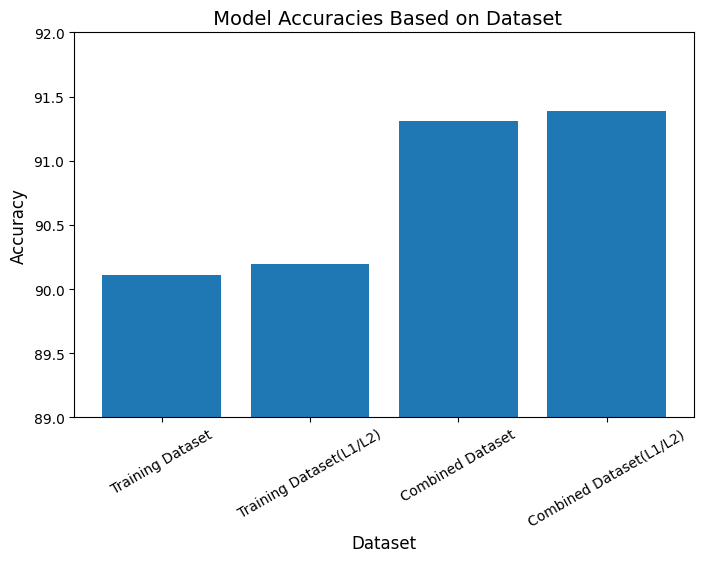

In [310]:
datasets = ['Training Dataset', 'Training Dataset(L1/L2)', 'Combined Dataset', 'Combined Dataset(L1/L2)']
accuracies = [90.111,90.195,91.311,91.391]

plt.figure(figsize=(8,5))
plt.bar(datasets, accuracies)
plt.title(' Model Accuracies Based on Dataset', fontsize=14)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

plt.xticks(rotation=30)
plt.ylim(89, 92)
plt.show()